In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/Admin/Downloads/Top_10000_Movies.csv/Top_10000_Movies.csv", encoding='latin1', engine='python')

In [3]:
data.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


In [4]:
data.shape

(10014, 13)

In [5]:
print('Columns: ',data.columns)
print('Number of Columns: ',len(data.columns))

Columns:  Index(['Unnamed: 0', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'overview',
       'revenue', 'runtime', 'tagline'],
      dtype='object')
Number of Columns:  13


In [6]:
data.describe()

,id,popularity,vote_average,vote_count,revenue,runtime
count,10002.000000,10000.000000,10000.00000,10000.000000,9.998000e+03,9989.000000
mean,250003.082683,34.516871,6.29875,1315.084900,5.737536e+07,98.792772
std,261732.329571,100.693958,1.43426,2501.899103,1.480897e+08,28.771525
min,0.000000,6.269000,0.00000,0.000000,0.000000e+00,0.000000
25%,11864.500000,11.908000,5.90000,118.000000,0.000000e+00,89.000000
50%,144312.000000,17.488000,6.50000,425.500000,5.931240e+05,99.000000
75%,451406.000000,29.626250,7.10000,1297.250000,4.768796e+07,113.000000
max,893478.000000,5401.308000,9.50000,30184.000000,2.847246e+09,400.000000


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10014 non-null  object 
 1   id                 10002 non-null  float64
 2   original_language  10002 non-null  object 
 3   original_title     10001 non-null  object 
 4   popularity         10000 non-null  float64
 5   release_date       9962 non-null   object 
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  float64
 8   genre              10000 non-null  object 
 9   overview           9900 non-null   object 
 10  revenue            9998 non-null   float64
 11  runtime            9989 non-null   float64
 12  tagline            7079 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1017.2+ KB


In [8]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)


In [9]:
print('Columns: ',data.columns)
print('Number of Columns: ',len(data.columns))

Columns:  Index(['id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'overview',
       'revenue', 'runtime', 'tagline'],
      dtype='object')
Number of Columns:  12


In [10]:
data.isnull().sum()

id                     12
original_language      12
original_title         13
popularity             14
release_date           52
vote_average           14
vote_count             14
genre                  14
overview              114
revenue                16
runtime                25
tagline              2935
dtype: int64

In [11]:
data.duplicated().sum()

11

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10003 entries, 0 to 10013
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10002 non-null  float64
 1   original_language  10002 non-null  object 
 2   original_title     10001 non-null  object 
 3   popularity         10000 non-null  float64
 4   release_date       9962 non-null   object 
 5   vote_average       10000 non-null  float64
 6   vote_count         10000 non-null  float64
 7   genre              10000 non-null  object 
 8   overview           9900 non-null   object 
 9   revenue            9998 non-null   float64
 10  runtime            9989 non-null   float64
 11  tagline            7079 non-null   object 
dtypes: float64(6), object(6)
memory usage: 1015.9+ KB


In [15]:
data["release_date"] = pd.to_datetime(data["release_date"], format="%Y-%m-%d")

In [16]:
data.release_date

0       2021-09-30
1       2021-11-03
2       2021-09-15
3       2021-10-27
4       2021-08-11
           ...    
10009   1990-05-18
10010   2006-09-12
10011   2013-09-10
10012   2007-03-23
10013   2016-05-20
Name: release_date, Length: 10003, dtype: datetime64[ns]

In [17]:
data.dropna(axis = 0, subset = ['release_date'], inplace = True)
data

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...
10009,530.0,en,A Grand Day Out,9.266,1990-05-18,7.5,594.0,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0.0,23.0,NaN
10010,15934.0,en,El cantante,10.417,2006-09-12,7.0,80.0,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, HÃ©ctor Lav...",0.0,116.0,"Based on the true story of the King of Salsa, ..."
10011,162215.0,en,How I Live Now,9.520,2013-09-10,6.6,705.0,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0.0,101.0,Love will lead you home
10012,5723.0,en,Once,9.267,2007-03-23,7.4,990.0,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513.0,85.0,How often do you find the right person?


In [18]:
data.loc[data.runtime.isna()]

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
1875,888826.0,en,UFC 268: Usman vs. Covington 2,23.631,2021-11-06,2.0,1.0,['Action'],Kamaru Usman vs. Colby Covington (Welterweight),NaN,NaN,None
4153,269437.0,en,Pixie Hollow Bake Off,20.697,2013-10-20,7.2,33.0,['Animation'],Tink challenges Gelata to see who can bake the...,NaN,NaN,None
5127,496032.0,en,Porno Baby,20.603,1974-02-24,5.6,5.0,['Drama'],A woman undergoes psychological evaluation for...,0.0,NaN,NaN
5264,273831.0,es,CÃ³mo Filmar Una XXX,19.330,2017-11-29,6.0,14.0,['Comedy'],"Ulises Alpuyeca, a film initiate, wants to ma...",0.0,NaN,NaN
6715,477214.0,en,Paris Porno,11.962,1976-01-01,5.8,4.0,[],A couple from the French countryside/provinces...,0.0,NaN,NaN
7098,333746.0,en,Sherkat-e Jahelan Dar Los Angeles,15.790,1980-01-02,3.5,2.0,[],Iranian film made in Los Angeles in the 1980s.,0.0,NaN,NaN
7166,543976.0,en,Marvel Zombies VS Army of Darkness,9.968,2013-11-18,0.0,0.0,"['Horror', 'Action', 'Science Fiction']",NaN,0.0,NaN,NaN
7724,450852.0,pt,Suzy... Sexo Ardente,9.582,1982-04-06,0.0,0.0,[],NaN,0.0,NaN,NaN
8313,504947.0,en,Halloween: Black Eyes,8.545,2010-02-13,2.5,2.0,[],Halloween Black Eyes is the 3rd Halloween Fan ...,0.0,NaN,NaN
8674,540242.0,pt,"Roberta, a Gueixa do Sexo",8.928,1978-06-22,0.0,0.0,[],NaN,0.0,NaN,NaN


In [19]:
data.dropna(subset=['runtime'],inplace=True)

In [20]:
data

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...
10009,530.0,en,A Grand Day Out,9.266,1990-05-18,7.5,594.0,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0.0,23.0,NaN
10010,15934.0,en,El cantante,10.417,2006-09-12,7.0,80.0,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, HÃ©ctor Lav...",0.0,116.0,"Based on the true story of the King of Salsa, ..."
10011,162215.0,en,How I Live Now,9.520,2013-09-10,6.6,705.0,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0.0,101.0,Love will lead you home
10012,5723.0,en,Once,9.267,2007-03-23,7.4,990.0,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513.0,85.0,How often do you find the right person?


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 10013
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 9951 non-null   float64       
 1   original_language  9951 non-null   object        
 2   original_title     9951 non-null   object        
 3   popularity         9951 non-null   float64       
 4   release_date       9951 non-null   datetime64[ns]
 5   vote_average       9951 non-null   float64       
 6   vote_count         9951 non-null   float64       
 7   genre              9951 non-null   object        
 8   overview           9864 non-null   object        
 9   revenue            9951 non-null   float64       
 10  runtime            9951 non-null   float64       
 11  tagline            7072 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 1010.6+ KB


In [22]:
data.drop(["tagline","overview"], axis=1, inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 10013
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 9951 non-null   float64       
 1   original_language  9951 non-null   object        
 2   original_title     9951 non-null   object        
 3   popularity         9951 non-null   float64       
 4   release_date       9951 non-null   datetime64[ns]
 5   vote_average       9951 non-null   float64       
 6   vote_count         9951 non-null   float64       
 7   genre              9951 non-null   object        
 8   revenue            9951 non-null   float64       
 9   runtime            9951 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 855.2+ KB


In [24]:
d2 = data.drop(data[data.revenue == 0].index)
d2

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,revenue,runtime
0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",424000000.0,97.0
1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",165000000.0,157.0
2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']",331116356.0,155.0
4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",331096766.0,115.0
5,574060.0,en,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347.0,"['Action', 'Thriller', 'Crime']",344931.0,114.0
...,...,...,...,...,...,...,...,...,...,...
9997,586791.0,en,Little Fish,8.964,2021-02-05,7.2,71.0,"['Romance', 'Science Fiction', 'Drama']",39053.0,101.0
10000,293310.0,en,Citizenfour,7.023,2014-10-24,7.8,994.0,['Documentary'],3003169.0,114.0
10001,24821.0,no,Skjult,8.390,2009-03-04,5.7,54.0,"['Thriller', 'Horror']",1489526.0,95.0
10003,9584.0,en,Convoy,11.516,1978-06-27,6.3,235.0,"['Action', 'Comedy']",45000000.0,110.0


In [25]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5342 entries, 0 to 10012
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5342 non-null   float64       
 1   original_language  5342 non-null   object        
 2   original_title     5342 non-null   object        
 3   popularity         5342 non-null   float64       
 4   release_date       5342 non-null   datetime64[ns]
 5   vote_average       5342 non-null   float64       
 6   vote_count         5342 non-null   float64       
 7   genre              5342 non-null   object        
 8   revenue            5342 non-null   float64       
 9   runtime            5342 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 459.1+ KB


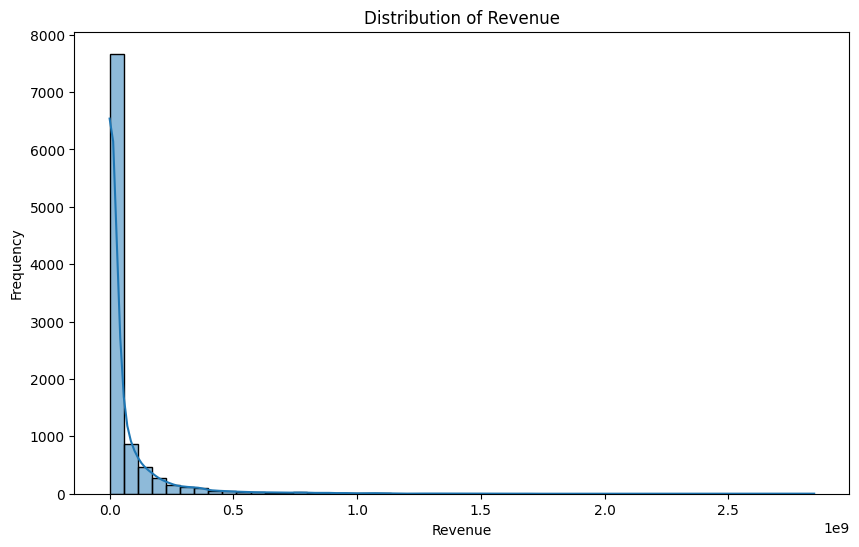

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data['revenue'], bins=50, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

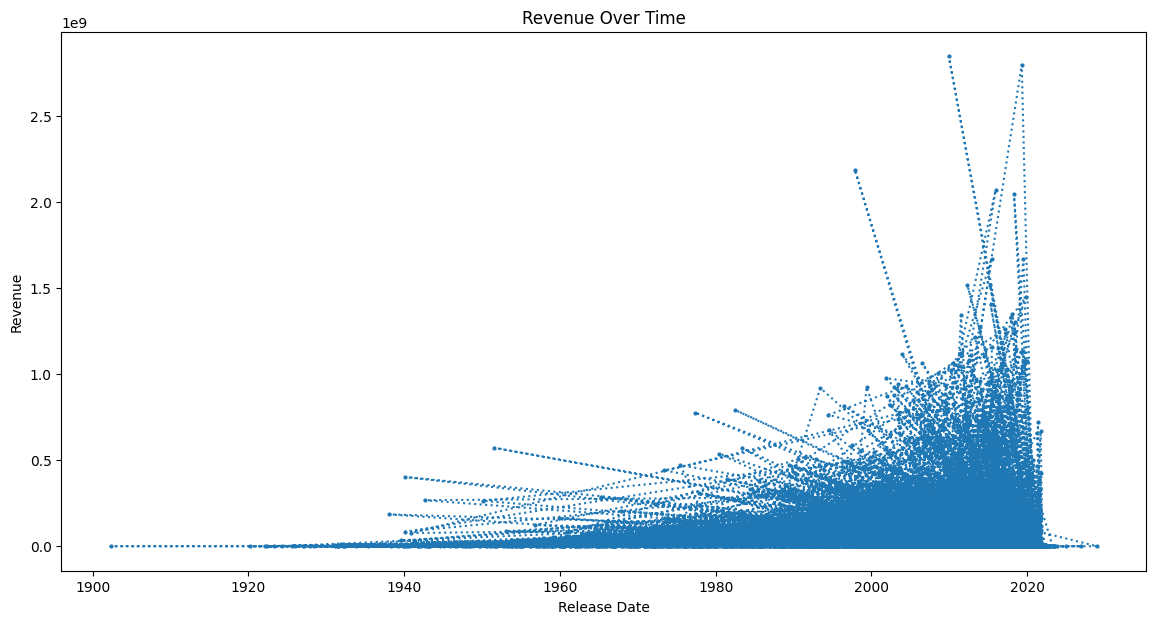

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(data['release_date'], data['revenue'], marker='o', linestyle='dotted', markersize=2)
plt.title('Revenue Over Time')
plt.xlabel('Release Date')
plt.ylabel('Revenue')
plt.show()

                    original_title       revenue
66                          Avatar  2.847246e+09
167              Avengers: Endgame  2.797801e+09
489                        Titanic  2.187464e+09
1013  Star Wars: The Force Awakens  2.068224e+09
97          Avengers: Infinity War  2.046240e+09
653                 Jurassic World  1.671713e+09
545                  The Lion King  1.667635e+09
173                   The Avengers  1.518816e+09
590                      Furious 7  1.515048e+09
230                      Frozen II  1.450027e+09


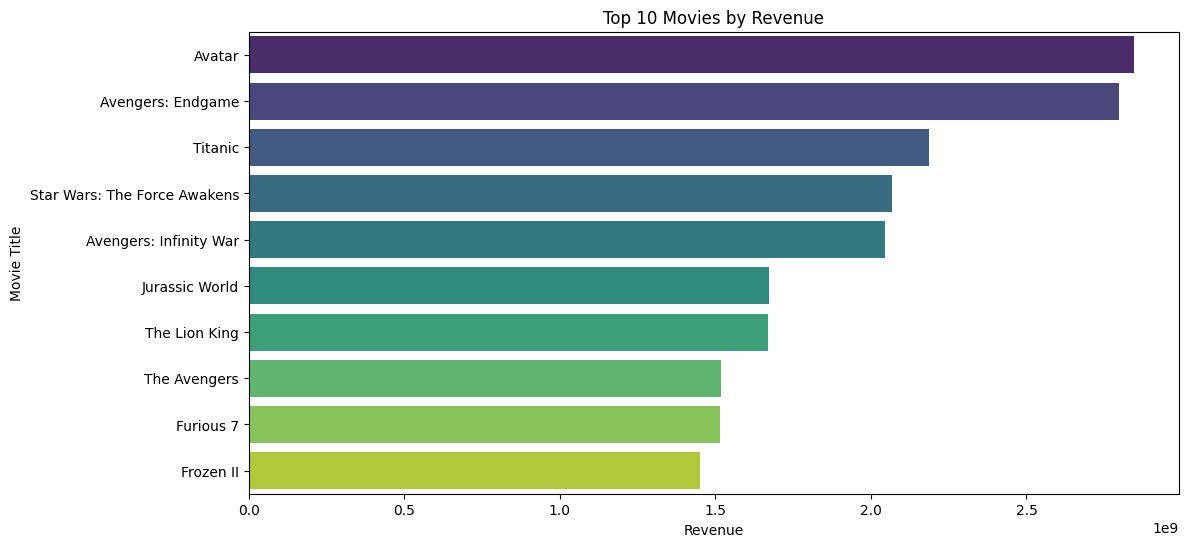

In [28]:
top_10_movies = data.nlargest(10, 'revenue')[['original_title', 'revenue']]
print(top_10_movies)

plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='original_title', data=top_10_movies, palette='viridis')
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.show()

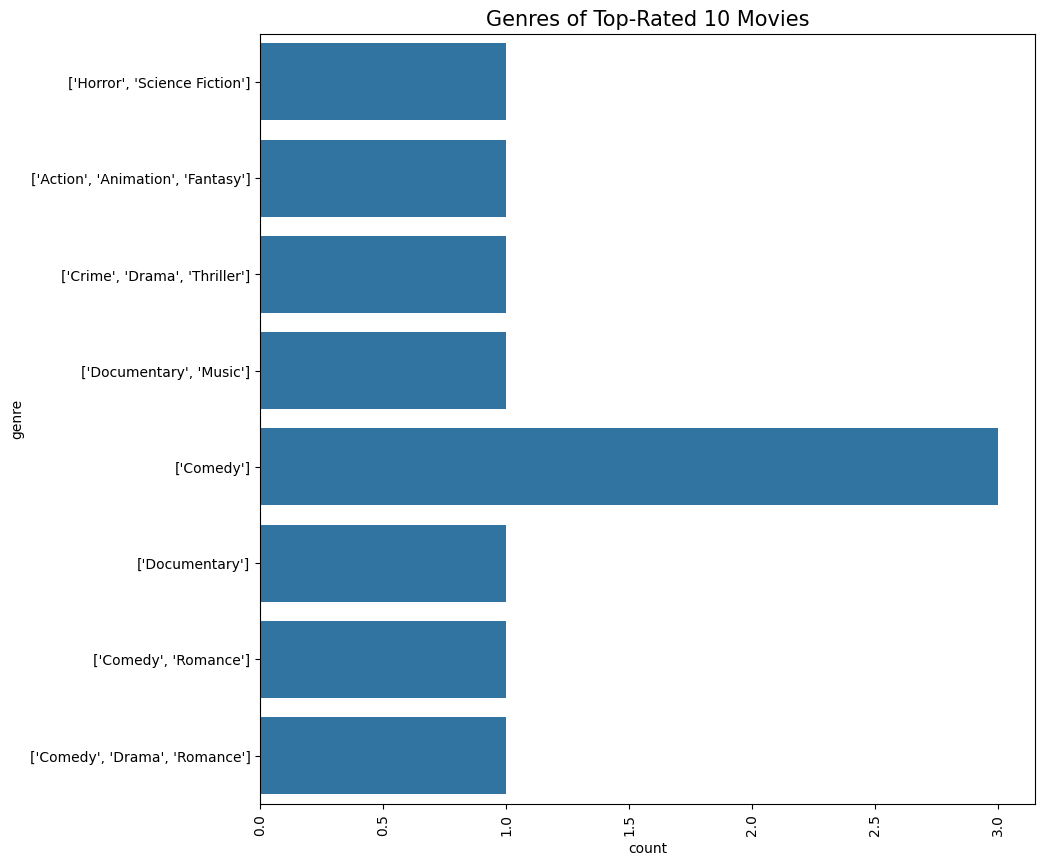

In [29]:
top_10_movies = data[data["genre"] != "[]"].sort_values(by="vote_average", ascending=False).head(10)
plt.figure(figsize=(10,10))
sns.countplot(top_10_movies["genre"])
plt.title("Genres of Top-Rated 10 Movies", size=15)
plt.xticks(rotation=90)
plt.show()

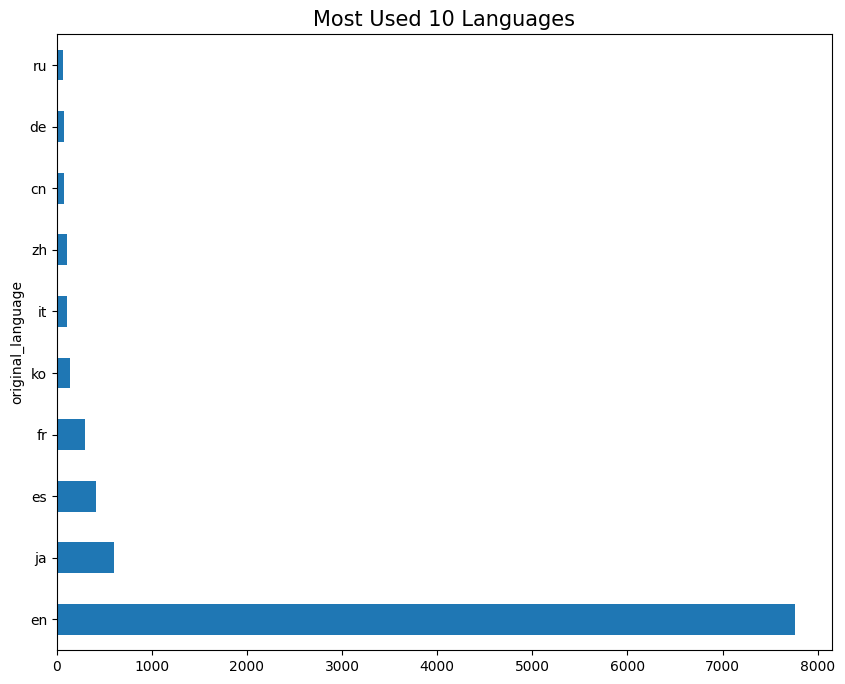

In [30]:
plt.figure(figsize=(10,8))
data["original_language"].value_counts().head(10).plot(kind='barh')
plt.title("Most Used 10 Languages", size=15)
plt.show()

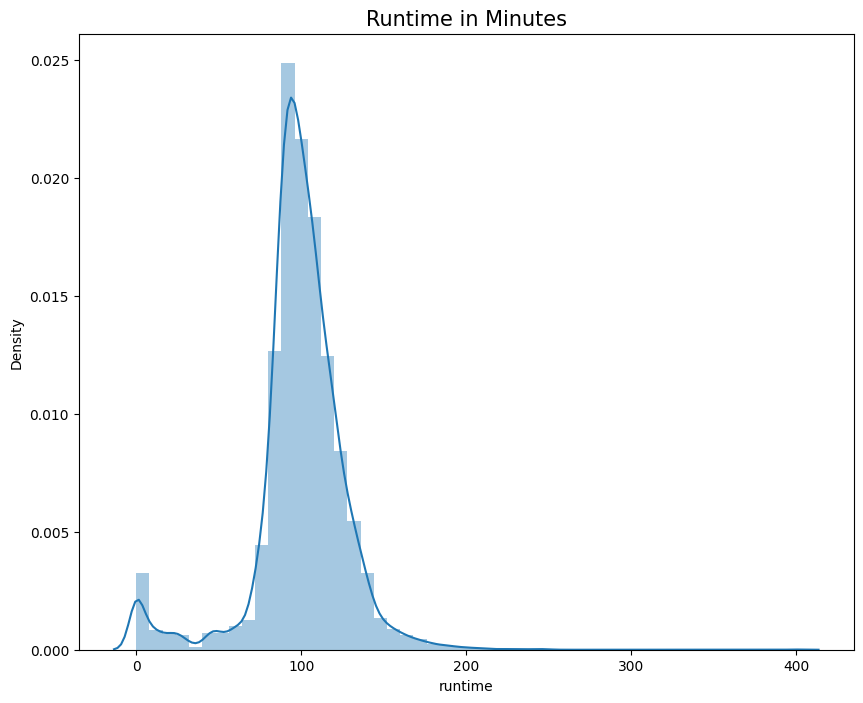

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(data["runtime"])
plt.title("Runtime in Minutes", size=15)
plt.show()

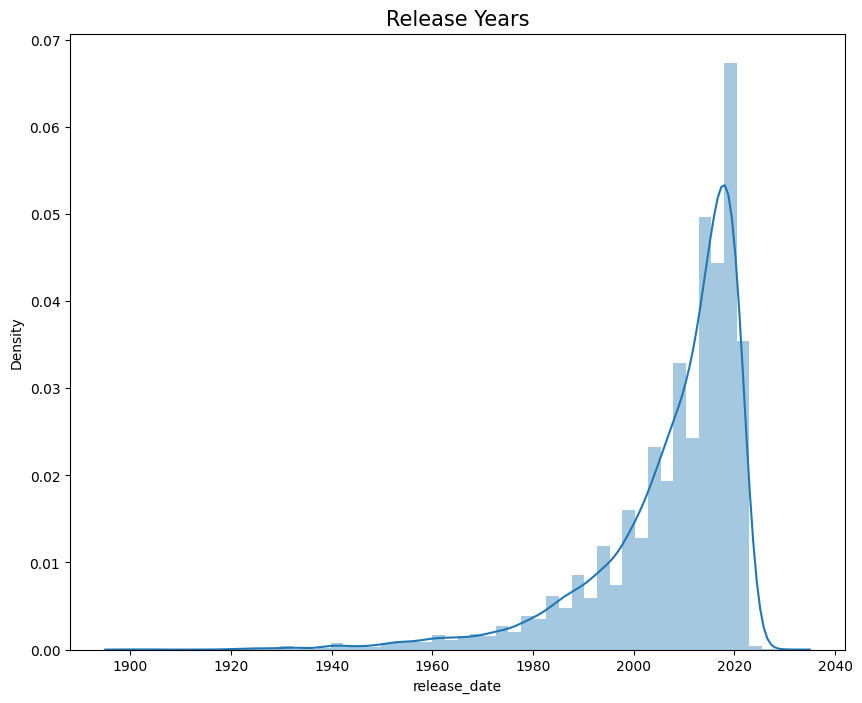

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(data["release_date"].dt.year)
plt.title("Release Years", size=15)
plt.show()

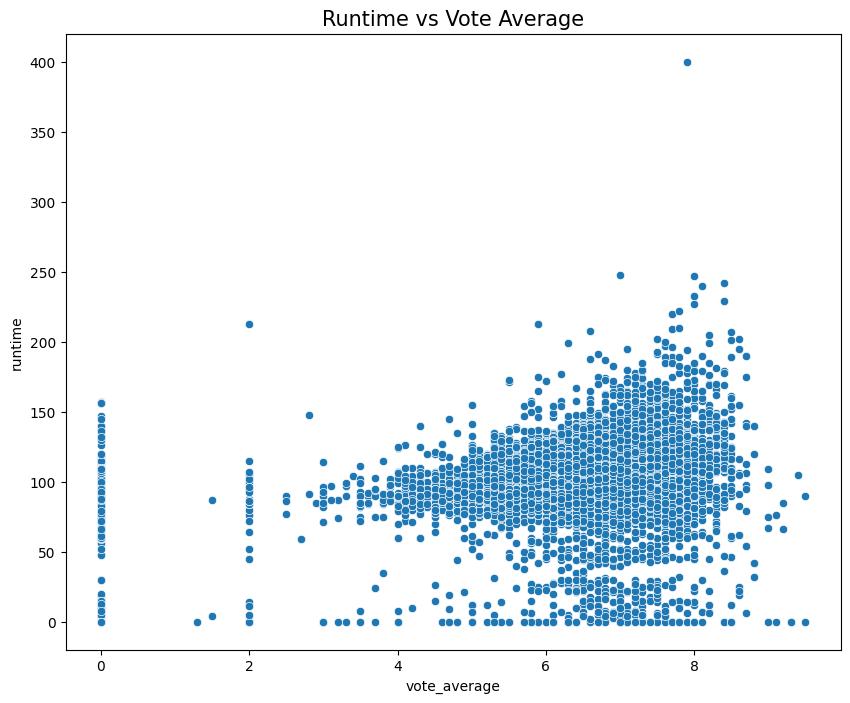

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data["vote_average"], y=data["runtime"])
plt.title("Runtime vs Vote Average", size=15)
plt.show()

In [40]:
data = data[['release_date', 'revenue']]

# Extract revenue column
revenues = data['revenue'].values

In [57]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_revenues = scaler.fit_transform(revenues.reshape(-1, 1))

In [58]:
# Prepare the data for RNN
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10
X, y = create_dataset(scaled_revenues, time_step)

In [59]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

In [60]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [61]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [62]:
model.fit(X_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 81s 10ms/step - loss: 0.0035
Epoch 2/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 74s 9ms/step - loss: 0.0030
Epoch 3/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 74s 9ms/step - loss: 0.0030
Epoch 4/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - loss: 0.0031
Epoch 5/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 76s 10ms/step - loss: 0.0031
Epoch 6/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 74s 9ms/step - loss: 0.0031
Epoch 7/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 76s 10ms/step - loss: 0.0030
Epoch 8/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - loss: 0.0032
Epoch 9/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 76s 10ms/step - loss: 0.0027
Epoch 10/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - loss: 0.0029
Epoch 11/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 77s 10ms/step - loss: 0.0034
Epoch 12/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - loss: 0.0026
Epoch 13/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - loss: 0.0031
Epoch 14/50
7952/7952 ━━━━━━━━━━━━━━━━━━━━ 73s 9ms/step - loss: 0.0031
Epoch 15/5

In [63]:
# Predict on the test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
import math
from sklearn.metrics import mean_squared_error

train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Train RMSE: 151685538.40503225
Test RMSE: 33104967.291960053


ValueError: x and y must have same first dimension, but have shapes (7963,) and (7952, 1)

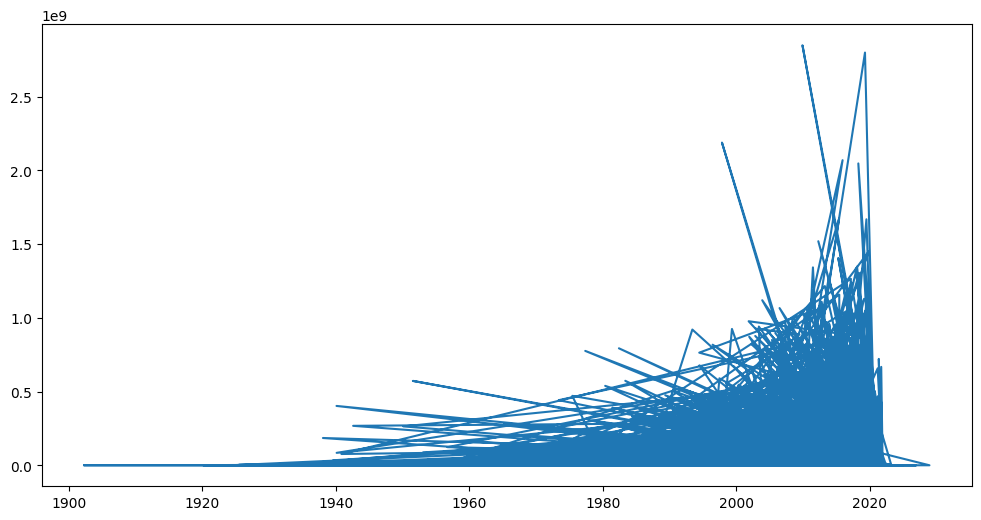

In [64]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['release_date'], scaler.inverse_transform(scaled_revenues), label='Actual Revenue')
plt.plot(data['release_date'][:train_size+time_step+1], train_predict, label='Train Prediction')
plt.plot(data['release_date'][train_size+time_step+1:], test_predict, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Box Office Revenue Prediction')
plt.legend()
plt.show()


In [78]:
data.columns

Index(['release_date', 'revenue'], dtype='object')

In [67]:
d2.columns

Index(['id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'revenue',
       'runtime'],
      dtype='object')

In [69]:
# Extract features and target variable
features = d2[['popularity', 'runtime', 'vote_average', 'vote_count']]
target = d2['log_revenue']

In [70]:
features = features.fillna(features.mean())

In [72]:
print(features.head())
print(target.head())

   popularity  runtime  vote_average  vote_count
0    5401.308     97.0           6.8      1736.0
1    3365.535    157.0           7.1       622.0
2    2911.423    155.0           8.0      3632.0
4    1850.470    115.0           7.8      3493.0
5    1453.423    114.0           6.5       347.0
0    424000000.0
1    165000000.0
2    331116356.0
4    331096766.0
5       344931.0
Name: revenue, dtype: float64


In [73]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
linear_model = LinearRegression()




In [75]:
# Train the model
linear_model.fit(X_train, y_train)



LinearRegression()

In [76]:
# Predict on test set
y_pred = linear_model.predict(X_test)



In [77]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.590993669613925e+16
R^2 Score: 0.5968558175083662


In [92]:
from imblearn.over_sampling import SMOTE


In [93]:
# Define a threshold for revenue to classify movies as hits or flops
threshold = d2['revenue'].median()

In [94]:
# Create a new column for the binary classification
d2['hit'] = (d2['revenue'] >= threshold).astype(int)

In [95]:
# Extract the new target variable
target_binary = d2['hit']

print(target_binary.value_counts())

hit
1    2671
0    2671
Name: count, dtype: int64


In [96]:
# Split the data into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(features, target_binary, test_size=0.2, random_state=42)


In [97]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_bin_smote, y_train_bin_smote = smote.fit_resample(X_train_bin, y_train_bin)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
logistic_model = LogisticRegression(max_iter=1000)


In [99]:
# Train the model
logistic_model.fit(X_train_bin_smote, y_train_bin_smote)

LogisticRegression(max_iter=1000)

In [100]:
# Predict on test set
y_pred_bin = logistic_model.predict(X_test_bin)



In [102]:
# Evaluate the model
accuracy = accuracy_score(y_test_bin, y_pred_bin)
conf_matrix = confusion_matrix(y_test_bin, y_pred_bin)
class_report = classification_report(y_test_bin, y_pred_bin)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7492984097287184
Confusion Matrix:
[[434  80]
 [188 367]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       514
           1       0.82      0.66      0.73       555

    accuracy                           0.75      1069
   macro avg       0.76      0.75      0.75      1069
weighted avg       0.76      0.75      0.75      1069



In [105]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [107]:

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')


In [108]:
# Train the model
grid_search.fit(X_train_bin_smote, y_train_bin_smote)



GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [109]:
# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")



Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.7600780206101309


In [110]:
# Use the best estimator to predict
best_logistic_model = grid_search.best_estimator_
y_pred_bin = best_logistic_model.predict(X_test_bin)



In [111]:
# Evaluate the model
accuracy = accuracy_score(y_test_bin, y_pred_bin)
conf_matrix = confusion_matrix(y_test_bin, y_pred_bin)
class_report = classification_report(y_test_bin, y_pred_bin)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7492984097287184
Confusion Matrix:
[[437  77]
 [191 364]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       514
           1       0.83      0.66      0.73       555

    accuracy                           0.75      1069
   macro avg       0.76      0.75      0.75      1069
weighted avg       0.76      0.75      0.75      1069



In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bin_smote, y_train_bin_smote)

RandomForestClassifier(random_state=42)

In [113]:
y_pred_rf = rf_model.predict(X_test_bin)

In [114]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test_bin, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_bin, y_pred_rf)
class_report_rf = classification_report(y_test_bin, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

Random Forest Accuracy: 0.7567820392890552
Confusion Matrix:
[[405 109]
 [151 404]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       514
           1       0.79      0.73      0.76       555

    accuracy                           0.76      1069
   macro avg       0.76      0.76      0.76      1069
weighted avg       0.76      0.76      0.76      1069



In [115]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_bin_smote, y_train_bin_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [116]:
y_pred_xgb = xgb_model.predict(X_test_bin)

In [117]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test_bin, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_bin, y_pred_xgb)
class_report_xgb = classification_report(y_test_bin, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(class_report_xgb)

XGBoost Accuracy: 0.7736202057998129
Confusion Matrix:
[[412 102]
 [140 415]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       514
           1       0.80      0.75      0.77       555

    accuracy                           0.77      1069
   macro avg       0.77      0.77      0.77      1069
weighted avg       0.78      0.77      0.77      1069



In [118]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [119]:
random_search = RandomizedSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, n_iter=10, scoring='accuracy', random_state=42)


In [120]:
random_search.fit(X_train_bin_smote, y_train_bin_smote)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [121]:
# Best parameters and best score
best_params_xgb = random_search.best_params_
best_score_xgb = random_search.best_score_

print(f"Best Parameters: {best_params_xgb}")
print(f"Best Cross-Validation Score: {best_score_xgb}")

Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}
Best Cross-Validation Score: 0.7846546128882707


In [122]:
# Use the best estimator to predict
best_xgb_model = random_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_bin)

In [123]:
# Evaluate the model
accuracy_best_xgb = accuracy_score(y_test_bin, y_pred_best_xgb)
conf_matrix_best_xgb = confusion_matrix(y_test_bin, y_pred_best_xgb)
class_report_best_xgb = classification_report(y_test_bin, y_pred_best_xgb)

print(f"Best XGBoost Accuracy: {accuracy_best_xgb}")
print("Confusion Matrix:")
print(conf_matrix_best_xgb)
print("Classification Report:")
print(class_report_best_xgb)

Best XGBoost Accuracy: 0.7792329279700655
Confusion Matrix:
[[415  99]
 [137 418]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       514
           1       0.81      0.75      0.78       555

    accuracy                           0.78      1069
   macro avg       0.78      0.78      0.78      1069
weighted avg       0.78      0.78      0.78      1069



vote_count      0.436494
popularity      0.267970
runtime         0.156290
vote_average    0.139246
dtype: float64


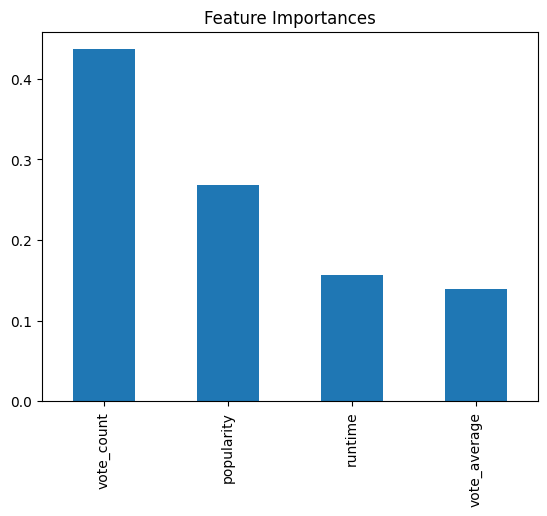

In [124]:
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=features.columns).sort_values(ascending=False)
print(feature_importances)

# Plot feature importances
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()